In [3]:
# Import the functions used in this project
from private_pkg.functions import *

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
def fitNaiveBayesModel(X, y):
    return MultinomialNB().fit(X, y)

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [2]:
df_train_dd = pd.read_csv("df_we_wanted_201807251743.csv")
df_train_fl = pd.read_csv("df_fl_model_201807260036.csv")

In [9]:
X_dd = df_train_dd[getColsToMakeFeatureMatrix(df_test, df_train)]
X_fl = df_train_fl[getColsToMakeFeatureMatrix(df_test, df_train, True)]

In [10]:
y = df_train_dd["TripType"]

In [11]:
model_dd = fitNaiveBayesModel(X_dd, y)
model_fl = fitNaiveBayesModel(X_fl, y)

In [12]:
y_pred_dd = model_dd.predict(X_dd)
y_pred_fl = model_fl.predict(X_fl)

In [16]:
report_dd = classification_report(y, y_pred_dd)

In [17]:
report_fl = classification_report(y, y_pred_fl)

In [23]:
report_dd_strip = report_dd.strip().split(" ")

In [24]:
report_dd_strip = [li for li in report_dd_strip if li != ""]

In [28]:
X_combined = pd.concat([X_dd, X_fl], axis=1)

In [29]:
model_combined = fitNaiveBayesModel(X_combined, y)

In [30]:
y_pred_combined = model_combined.predict(X_combined)

In [87]:
getAccuracy(y, y_pred_combined, len(df_train_dd))

##### Accuracy : 0.526

In [77]:
report_fl_df

,precision,recall,f1-score,support
TripType,,,,
3,0.87,0.95,0.91,3643
4,0.71,0.26,0.38,346
5,0.72,0.71,0.72,4593
6,0.71,0.59,0.64,1277
7,0.69,0.72,0.71,5752
8,0.39,0.59,0.47,12161
9,0.62,0.58,0.60,9464
12,0.56,0.34,0.42,269
14,1.00,0.75,0.86,4


In [170]:
df_report = compareClassificationReport(report_dd, report_fl)

,TripType,precision,recall,f1-score,support,model
0,3,0.87,0.95,0.91,3643,fl
1,3,0.80,0.87,0.84,3643,dd


,TripType,precision,recall,f1-score,support,model
2,4,0.71,0.26,0.38,346,fl
3,4,0.07,0.04,0.05,346,dd


,TripType,precision,recall,f1-score,support,model
4,5,0.72,0.71,0.72,4593,fl
5,5,0.75,0.81,0.78,4593,dd


,TripType,precision,recall,f1-score,support,model
6,6,0.71,0.59,0.64,1277,fl
7,6,0.48,0.55,0.51,1277,dd


,TripType,precision,recall,f1-score,support,model
8,7,0.69,0.72,0.71,5752,fl
9,7,0.60,0.66,0.63,5752,dd


,TripType,precision,recall,f1-score,support,model
10,8,0.39,0.59,0.47,12161,fl
11,8,0.36,0.52,0.42,12161,dd


,TripType,precision,recall,f1-score,support,model
12,9,0.62,0.58,0.60,9464,fl
13,9,0.57,0.45,0.50,9464,dd


,TripType,precision,recall,f1-score,support,model
14,12,0.56,0.34,0.42,269,fl
15,12,0.15,0.21,0.18,269,dd


,TripType,precision,recall,f1-score,support,model
16,14,1.00,0.75,0.86,4,fl
17,14,0.05,0.50,0.09,4,dd


,TripType,precision,recall,f1-score,support,model
18,15,0.52,0.60,0.56,978,fl
19,15,0.37,0.49,0.42,978,dd


,TripType,precision,recall,f1-score,support,model
20,18,0.60,0.42,0.50,549,fl
21,18,0.38,0.53,0.44,549,dd


,TripType,precision,recall,f1-score,support,model
22,19,0.83,0.25,0.38,375,fl
23,19,0.39,0.23,0.29,375,dd


,TripType,precision,recall,f1-score,support,model
24,20,0.69,0.46,0.55,637,fl
25,20,0.47,0.73,0.57,637,dd


,TripType,precision,recall,f1-score,support,model
26,21,0.59,0.65,0.62,641,fl
27,21,0.41,0.76,0.53,641,dd


,TripType,precision,recall,f1-score,support,model
28,22,0.73,0.43,0.54,928,fl
29,22,0.45,0.22,0.30,928,dd


,TripType,precision,recall,f1-score,support,model
30,23,0.84,0.12,0.20,139,fl
31,23,0.27,0.20,0.23,139,dd


,TripType,precision,recall,f1-score,support,model
32,24,0.59,0.60,0.59,2609,fl
33,24,0.51,0.64,0.57,2609,dd


,TripType,precision,recall,f1-score,support,model
34,25,0.60,0.68,0.64,3698,fl
35,25,0.56,0.74,0.64,3698,dd


,TripType,precision,recall,f1-score,support,model
36,26,0.69,0.41,0.51,503,fl
37,26,0.36,0.51,0.42,503,dd


,TripType,precision,recall,f1-score,support,model
38,27,0.61,0.61,0.61,785,fl
39,27,0.49,0.71,0.58,785,dd


,TripType,precision,recall,f1-score,support,model
40,28,0.74,0.45,0.56,492,fl
41,28,0.38,0.52,0.44,492,dd


,TripType,precision,recall,f1-score,support,model
42,29,0.85,0.49,0.62,433,fl
43,29,0.20,0.09,0.12,433,dd


,TripType,precision,recall,f1-score,support,model
44,30,0.77,0.32,0.45,1081,fl
45,30,0.40,0.37,0.38,1081,dd


,TripType,precision,recall,f1-score,support,model
46,31,0.83,0.65,0.73,594,fl
47,31,0.65,0.82,0.72,594,dd


,TripType,precision,recall,f1-score,support,model
48,32,0.65,0.70,0.67,1984,fl
49,32,0.59,0.78,0.67,1984,dd


,TripType,precision,recall,f1-score,support,model
50,33,0.46,0.61,0.52,1315,fl
51,33,0.39,0.66,0.49,1315,dd


,TripType,precision,recall,f1-score,support,model
52,34,0.48,0.59,0.53,719,fl
53,34,0.39,0.74,0.51,719,dd


,TripType,precision,recall,f1-score,support,model
54,35,0.47,0.51,0.49,2030,fl
55,35,0.50,0.54,0.52,2030,dd


,TripType,precision,recall,f1-score,support,model
56,36,0.44,0.69,0.54,3005,fl
57,36,0.44,0.65,0.53,3005,dd


,TripType,precision,recall,f1-score,support,model
58,37,0.50,0.72,0.59,2788,fl
59,37,0.44,0.67,0.53,2788,dd


,TripType,precision,recall,f1-score,support,model
60,38,0.55,0.64,0.59,2912,fl
61,38,0.35,0.56,0.43,2912,dd


,TripType,precision,recall,f1-score,support,model
62,39,0.41,0.41,0.41,9896,fl
63,39,0.39,0.21,0.27,9896,dd


,TripType,precision,recall,f1-score,support,model
64,40,0.52,0.53,0.52,6130,fl
65,40,0.41,0.30,0.35,6130,dd


,TripType,precision,recall,f1-score,support,model
66,41,0.77,0.24,0.36,583,fl
67,41,0.32,0.07,0.11,583,dd


,TripType,precision,recall,f1-score,support,model
68,42,0.64,0.30,0.41,1858,fl
69,42,0.48,0.10,0.16,1858,dd


,TripType,precision,recall,f1-score,support,model
70,43,0.66,0.14,0.23,872,fl
71,43,0.15,0.04,0.06,872,dd


,TripType,precision,recall,f1-score,support,model
72,44,0.66,0.35,0.46,1187,fl
73,44,0.40,0.17,0.24,1187,dd


,TripType,precision,recall,f1-score,support,model
74,999,0.62,0.21,0.32,8444,fl
75,999,0.09,0.03,0.05,8444,dd


,TripType,precision,recall,f1-score,support,model
76,total,0.57,0.55,0.54,95674,fl
77,total,0.44,0.47,0.44,95674,dd


In [32]:
report_dd_strip[:4]

['precision', 'recall', 'f1-score', 'support\n\n']

In [14]:
print(classification_report(y, y_pred_dd))

             precision    recall  f1-score   support

          3       0.80      0.87      0.84      3643
          4       0.07      0.04      0.05       346
          5       0.75      0.81      0.78      4593
          6       0.48      0.55      0.51      1277
          7       0.60      0.66      0.63      5752
          8       0.36      0.52      0.42     12161
          9       0.57      0.45      0.50      9464
         12       0.15      0.21      0.18       269
         14       0.05      0.50      0.09         4
         15       0.37      0.49      0.42       978
         18       0.38      0.53      0.44       549
         19       0.39      0.23      0.29       375
         20       0.47      0.73      0.57       637
         21       0.41      0.76      0.53       641
         22       0.45      0.22      0.30       928
         23       0.27      0.20      0.23       139
         24       0.51      0.64      0.57      2609
         25       0.56      0.74      0.64   

In [15]:
print(classification_report(y, y_pred_fl))

             precision    recall  f1-score   support

          3       0.87      0.95      0.91      3643
          4       0.71      0.26      0.38       346
          5       0.72      0.71      0.72      4593
          6       0.71      0.59      0.64      1277
          7       0.69      0.72      0.71      5752
          8       0.39      0.59      0.47     12161
          9       0.62      0.58      0.60      9464
         12       0.56      0.34      0.42       269
         14       1.00      0.75      0.86         4
         15       0.52      0.60      0.56       978
         18       0.60      0.42      0.50       549
         19       0.83      0.25      0.38       375
         20       0.69      0.46      0.55       637
         21       0.59      0.65      0.62       641
         22       0.73      0.43      0.54       928
         23       0.84      0.12      0.20       139
         24       0.59      0.60      0.59      2609
         25       0.60      0.68      0.64   

In [31]:
print(classification_report(y, y_pred_combined))

             precision    recall  f1-score   support

          3       0.90      0.94      0.92      3643
          4       0.91      0.43      0.59       346
          5       0.81      0.84      0.82      4593
          6       0.76      0.81      0.79      1277
          7       0.71      0.73      0.72      5752
          8       0.36      0.38      0.37     12161
          9       0.63      0.32      0.42      9464
         12       0.51      0.31      0.39       269
         14       1.00      0.50      0.67         4
         15       0.41      0.64      0.50       978
         18       0.46      0.65      0.54       549
         19       0.80      0.60      0.69       375
         20       0.45      0.78      0.57       637
         21       0.40      0.83      0.54       641
         22       0.57      0.67      0.62       928
         23       0.90      0.37      0.53       139
         24       0.54      0.73      0.62      2609
         25       0.54      0.78      0.64   

In [72]:
np.trace(confusion_matrix(y, y_pred_combined))/len(df_train_dd)

0.5260363317097644

In [74]:
df_train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [75]:
df_wd = pd.DataFrame(df_train.groupby(["VisitNumber", "TripType", "Weekday"]).sum()["ScanCount"]).reset_index()

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
def changeMaxDepth(m_d, X, y):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=m_d, random_state=0).fit(X, y)
    return tree

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
m_d = list(range(1, 21))
scores_li = []
cv = KFold(5)
scores = np.zeros(len(m_d))
for i, md in enumerate(m_d):
    tree = changeMaxDepth(md, X_combined, y)
    scores_li.append(cross_val_score(tree, X_combined, y, cv=cv))

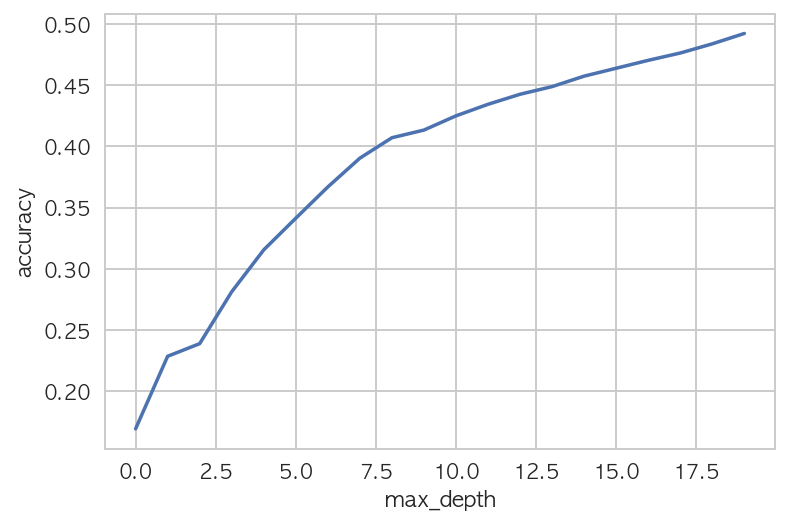

In [176]:
score_mean = []
for li in scores_li:
    score_mean.append(li.mean())
    plt.ylabel("accuracy")
plt.xlabel("max_depth")
plt.plot(score_mean)

In [178]:
!pip3 install xgboost

    100% |████████████████████████████████| 583kB 10.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/misfits/Library/Caches/pip/wheels/7d/45/ff/92c864d34ae8e77df45b3e808eff15271a4d7dc071707b4f40
Successfully built xgboost
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [179]:
import xgboost
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [246]:
model_xgb_fl = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [190]:
df_test_dd = pd.read_csv("df_test_we_wanted_201807252203.csv")

In [193]:
cols = getColsToMakeFeatureMatrix(df_test, df_train)

In [194]:
X_test_xgb = df_test_dd[cols]

In [198]:
len(df_test_dd)


95674

In [202]:
len(X_combined)

95674

In [255]:
cols = X_fl.columns

In [256]:
cols

Index(['-1.0', '1.0', '0.0', '2.0', '4.0', '5.0', '6.0', '7.0', '8200.0',
       '9.0',
       ...
       '8173.0', '8175.0', '8176.0', '1625.0', '8180.0', '1626.0', '8185.0',
       '1627.0', '8190.0', '8191.0'],
      dtype='object', length=5355)

In [262]:
li = cols[1:]

In [263]:
li

Index(['1.0', '0.0', '2.0', '4.0', '5.0', '6.0', '7.0', '8200.0', '9.0',
       '8202.0',
       ...
       '8173.0', '8175.0', '8176.0', '1625.0', '8180.0', '1626.0', '8185.0',
       '1627.0', '8190.0', '8191.0'],
      dtype='object', length=5354)

ValueError: Wrong number of items passed 2, placement implies 1

In [247]:
%time model_xgb_fl.fit(X_fl, y)

ValueError: feature_names must be unique

In [273]:
train_fl_li = [fl if not np.isnan(fl) else -1  for fl in df_train["FinelineNumber"].unique()]
test_fl_li = [fl if not np.isnan(fl) else -1  for fl in df_test["FinelineNumber"].unique()]

In [274]:
tmp_li = list(set(list(test_fl_li) + list(train_fl_li)))

In [276]:
len(tmp_li)

5354

In [275]:
for tmp in tmp_li:
    if np.isnan(tmp):
        print(tmp)

In [267]:
dd_cols = [li if not np.isnan(li) else -1.0 for li in list(set(list(test_fl_li) + list(train_fl_li)))]

NameError: name 'test_fl_li' is not defined

In [195]:
y_pred_test_xgb = model_xgb.predict(X_test_xgb)

In [205]:
y_pred_proba_xgb = model_xgb.predict_proba(X_test_xgb)

In [222]:
y_pred_proba_xgb_df["VisitNumber"] = submission["VisitNumber"]

In [219]:
y_pred_proba_xgb_df["VisitNumber"] = 0

In [227]:
submission.columns[1:]

Index(['TripType_3', 'TripType_4', 'TripType_5', 'TripType_6', 'TripType_7',
       'TripType_8', 'TripType_9', 'TripType_12', 'TripType_14', 'TripType_15',
       'TripType_18', 'TripType_19', 'TripType_20', 'TripType_21',
       'TripType_22', 'TripType_23', 'TripType_24', 'TripType_25',
       'TripType_26', 'TripType_27', 'TripType_28', 'TripType_29',
       'TripType_30', 'TripType_31', 'TripType_32', 'TripType_33',
       'TripType_34', 'TripType_35', 'TripType_36', 'TripType_37',
       'TripType_38', 'TripType_39', 'TripType_40', 'TripType_41',
       'TripType_42', 'TripType_43', 'TripType_44', 'TripType_999'],
      dtype='object')

In [235]:
submission.columns[1:]

Index(['TripType_3', 'TripType_4', 'TripType_5', 'TripType_6', 'TripType_7',
       'TripType_8', 'TripType_9', 'TripType_12', 'TripType_14', 'TripType_15',
       'TripType_18', 'TripType_19', 'TripType_20', 'TripType_21',
       'TripType_22', 'TripType_23', 'TripType_24', 'TripType_25',
       'TripType_26', 'TripType_27', 'TripType_28', 'TripType_29',
       'TripType_30', 'TripType_31', 'TripType_32', 'TripType_33',
       'TripType_34', 'TripType_35', 'TripType_36', 'TripType_37',
       'TripType_38', 'TripType_39', 'TripType_40', 'TripType_41',
       'TripType_42', 'TripType_43', 'TripType_44', 'TripType_999'],
      dtype='object')

In [239]:
submit_proba_xgb = pd.concat([submission["VisitNumber"], y_pred_proba_xgb_df], axis=1)

In [241]:
saveDataFrameToCsv(submit_proba_xgb, "submit_proba_xgb")

In [236]:
y_pred_proba_xgb_df = pd.DataFrame(y_pred_proba_xgb, columns = submission.columns[1:])

In [188]:
getAccuracy(y, y_pred_xgb, len(X_dd))

##### Accuracy : 0.5981

In [203]:
y_pred_test_xgb

array([ 38,   8, 999, ...,   8,  32,  25])

In [196]:
df_submit_xgb_1 = makeSubmissionDf(submission, y_pred_test_xgb)

0명 진행됨. 아직 95674명 데이터 남음.
5000명 진행됨. 아직 90674명 데이터 남음.
10000명 진행됨. 아직 85674명 데이터 남음.
15000명 진행됨. 아직 80674명 데이터 남음.
20000명 진행됨. 아직 75674명 데이터 남음.
25000명 진행됨. 아직 70674명 데이터 남음.
30000명 진행됨. 아직 65674명 데이터 남음.
35000명 진행됨. 아직 60674명 데이터 남음.
40000명 진행됨. 아직 55674명 데이터 남음.
45000명 진행됨. 아직 50674명 데이터 남음.
50000명 진행됨. 아직 45674명 데이터 남음.
55000명 진행됨. 아직 40674명 데이터 남음.
60000명 진행됨. 아직 35674명 데이터 남음.
65000명 진행됨. 아직 30674명 데이터 남음.
70000명 진행됨. 아직 25674명 데이터 남음.
75000명 진행됨. 아직 20674명 데이터 남음.
80000명 진행됨. 아직 15674명 데이터 남음.
85000명 진행됨. 아직 10674명 데이터 남음.
90000명 진행됨. 아직 5674명 데이터 남음.
95000명 진행됨. 아직 674명 데이터 남음.


In [197]:
saveDataFrameToCsv(df_submit_xgb_1, "submit_xgb_1")